In [88]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster._hierarchy as sch


In [89]:
Data=pd.read_csv('Mall_Customers.csv')

In [90]:
Data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [91]:
Data.shape

(200, 5)

In [92]:
Data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [93]:
Data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [94]:
#Df=Data.drop('Genre',axis=1)

In [95]:
#Df.head()

C:\Users\HEMNATH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


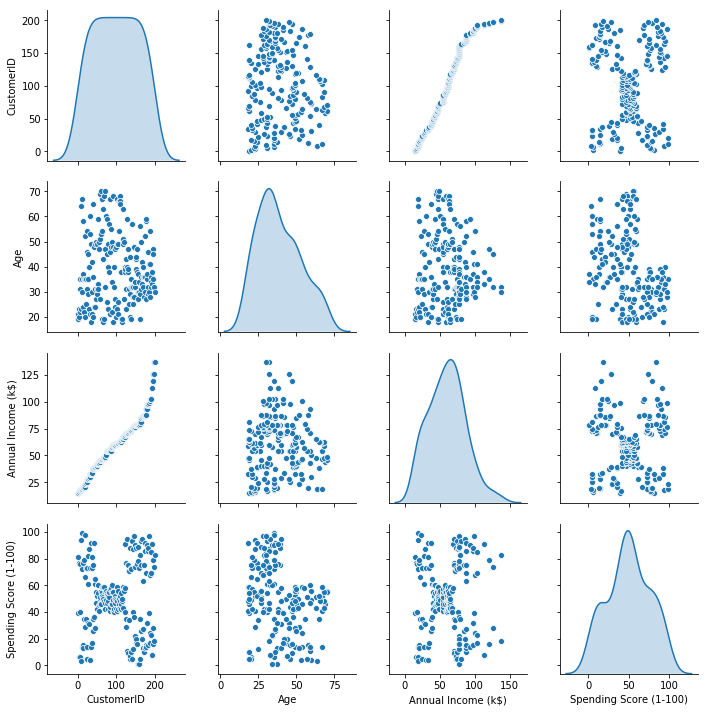

In [96]:
import seaborn as sns
sns.pairplot(Data,diag_kind='kde')
plt.show()

In [97]:
x=Data.iloc[:,[3,4]].values

In [98]:
#elbow method
ks=range(1,9)
inertia=[]

In [99]:
for k in ks:
    #model Kmeans
    model=KMeans(n_clusters=k,random_state=42)
    #fit the model
    model.fit(x)
    #append the inertia value in wcss
    inertia.append(model.inertia_)

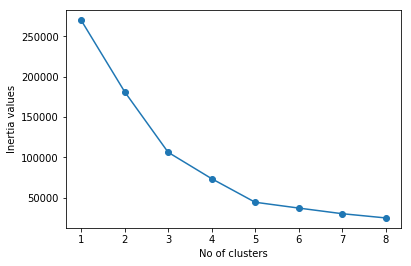

In [100]:
plt.plot(ks,inertia,'-o')
plt.xlabel('No of clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

In [101]:
# KMeans algorithm
models=KMeans(n_clusters=5,random_state=42)
models

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [102]:
models.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [103]:
labels=models.predict(x)

In [104]:
labels

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [105]:
# finding the centroids
x[labels==0,0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

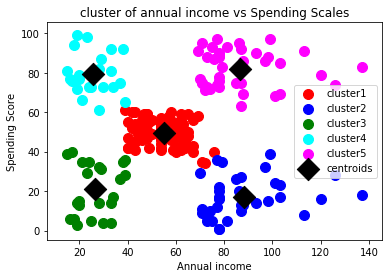

In [110]:
## plotting the cluster
plt.scatter(x[labels==0,0],x[labels==0,1],s=100, c='red',label='cluster1')
plt.scatter(x[labels==1,0],x[labels==1,1],s=100, c='blue',label='cluster2')
plt.scatter(x[labels==2,0],x[labels==2,1],s=100, c='green',label='cluster3')
plt.scatter(x[labels==3,0],x[labels==3,1],s=100, c='cyan',label='cluster4')
plt.scatter(x[labels==4,0],x[labels==4,1],s=100, c='magenta',label='cluster5')
plt.scatter(models.cluster_centers_[:,0],models.cluster_centers_[:,1],s=250,c='black',marker='D',label='centroids')
plt.title('cluster of annual income vs Spending Scales')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# DENDOGRAM

In [114]:
#importing the hierarchy
import scipy.cluster.hierarchy as sch

In [115]:
sch.linkage(x,method='ward') # ward minimizes the WCSS  #linkage is used to find the distance

array([[ 65.        ,  68.        ,   0.        ,   2.        ],
       [ 48.        ,  49.        ,   0.        ,   2.        ],
       [156.        , 158.        ,   0.        ,   2.        ],
       [129.        , 131.        ,   0.        ,   2.        ],
       [ 21.        ,  23.        ,   1.        ,   2.        ],
       [ 51.        ,  53.        ,   1.        ,   2.        ],
       [ 60.        ,  61.        ,   1.        ,   2.        ],
       [ 67.        ,  69.        ,   1.        ,   2.        ],
       [ 64.        ,  66.        ,   1.        ,   2.        ],
       [ 79.        ,  82.        ,   1.        ,   2.        ],
       [ 74.        ,  85.        ,   1.        ,   2.        ],
       [ 78.        ,  80.        ,   1.        ,   2.        ],
       [ 75.        ,  81.        ,   1.        ,   2.        ],
       [ 92.        ,  97.        ,   1.        ,   2.        ],
       [101.        , 109.        ,   1.        ,   2.        ],
       [107.        , 113

Text(0,0.5,'Distance Measure')

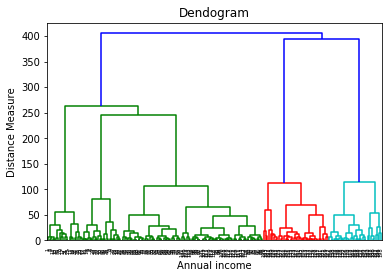

In [119]:
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendogram')
plt.xlabel('Annual income')
plt.ylabel('Distance Measure')

In [120]:
from sklearn.cluster import AgglomerativeClustering

In [121]:
model_h=AgglomerativeClustering(n_clusters=5,linkage='ward')

In [122]:
model_h

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func=<function mean at 0x00000212FFAFEC80>)

In [123]:
Hc = model_h.fit_predict(x)

In [124]:
Hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

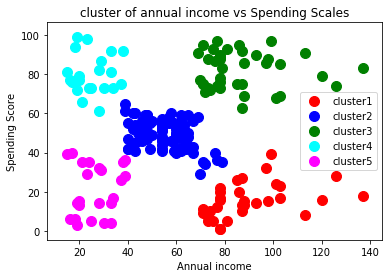

In [126]:
plt.scatter(x[Hc==0,0],x[Hc==0,1],s=100, c='red',label='cluster1')
plt.scatter(x[Hc==1,0],x[Hc==1,1],s=100, c='blue',label='cluster2')
plt.scatter(x[Hc==2,0],x[Hc==2,1],s=100, c='green',label='cluster3')
plt.scatter(x[Hc==3,0],x[Hc==3,1],s=100, c='cyan',label='cluster4')
plt.scatter(x[Hc==4,0],x[Hc==4,1],s=100, c='magenta',label='cluster5')
plt.title('cluster of annual income vs Spending Scales')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()